In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from scipy.integrate import odeint
import time
from IPython import display
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.labelsize'] = 20  
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['axes.titlepad'] = 40 
plt.rcParams['axes.labelpad'] = 16 

In [6]:
#H2O2 decomp - using Table 2 from Foustoukos, 2010

#t (min), H2 (mmol/kg) and H2O2 (mmol/kg) for each temperature
#at T = 95:
concentrations_55 = np.array([[92, 135, 185, 241, 347, 427], [3.99, 3.84, 3.01, 2.89, 2.43, 2.40], [0.001, 0.001, 0.001, 0.001, 0.001, 0.001]])
concentrations_95a = np.array([[50, 79, 105, 149, 182, 211, 240, 252, 289, 322, 360], [7.46, 6.43, 5.19, 5.42, 5.06, 4.22, 4.55, 4.05, 3.47, 3.57, 2.27], [0.064, 0.123, 0.154, 0.154, 0.172, 0.148, 0.145, 0.147, 0.156, 0.118, 0.100]])
concentrations_95b = np.array([[29, 110, 123, 154, 163], [8.73, 3.68, 4.46, 6.46, 5.40], [0.047, 0.048, 0.036, 0.003, 0.001]])
concentrations_125 = np.array([[42, 57, 68, 87, 129, 157, 184, 213, 242, 291, 335, 391, 421], [4.61, 2.54, 2.76, 2.04, 1.31, 0.965, 0.677, 0.480, 0.337, 0.245, 0.129, 0.060, 0.058], [0.113, 0.110, 0.124, 0.077, 0.051, 0.038, 0.025, 0.029, 0.006, 0.008, 0.005, 0.001, 0.001]])
concentrations_130 = np.array([[47, 62, 92, 107, 122, 152, 182], [3.15, 2.86, 2.62, 2.17, 2.77, 2.11, 1.77], [0.008, 0.012, 0.008, 0.018, 0.015, 0.010, 0.009]])


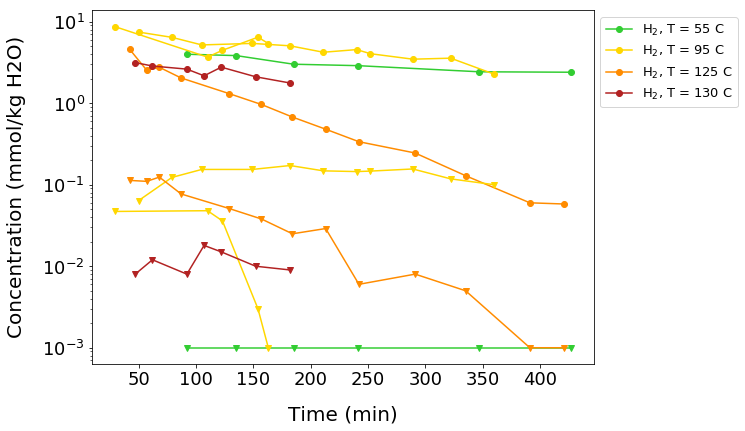

In [7]:
#Now let's plot stuff
#H2O2 and H2 conc over time
fig1 = plt.figure(20)
fig1.set_figheight(6.5)
fig1.set_figwidth(9)
plt.clf()
#H2:
plt.plot(concentrations_55[0], concentrations_55[1], 'o-', color = 'limegreen', label = 'H$_2$, T = 55 C')
plt.plot(concentrations_95a[0], concentrations_95a[1], 'o-', color = 'gold')
plt.plot(concentrations_95b[0], concentrations_95b[1], 'o-', color = 'gold', label = 'H$_2$, T = 95 C')
plt.plot(concentrations_125[0], concentrations_125[1], 'o-', color = 'darkorange', label = 'H$_2$, T = 125 C')
plt.plot(concentrations_130[0], concentrations_130[1], 'o-', color = 'firebrick', label = 'H$_2$, T = 130 C')
#H2O2
plt.plot(concentrations_55[0], concentrations_55[2], 'v-', color = 'limegreen')
plt.plot(concentrations_95a[0], concentrations_95a[2], 'v-', color = 'gold')
plt.plot(concentrations_95b[0], concentrations_95b[2], 'v-', color = 'gold')
plt.plot(concentrations_125[0], concentrations_125[2], 'v-', color = 'darkorange')
plt.plot(concentrations_130[0], concentrations_130[2], 'v-', color = 'firebrick')
plt.xlabel('Time (min)')
plt.ylabel('Concentration (mmol/kg H2O)')
plt.yscale('log')
plt.legend(bbox_to_anchor=(1,1), prop={'size': 13})
#plt.xlim(0,300)
#plt.ticklabel_format(style = 'sci', axis = 'x', )
#plt.ylim(1,3000)
#plt.yscale('log')
#plt.savefig('O2H2halflife.png')
plt.show()

In [8]:
#Now let's calculate the decomp rate without H2 from the kinetics given in the paper

#initial H2O2 values:
H2O2_0 = np.array([concentrations_55[2,0], concentrations_95a[2,0], concentrations_125[2,0], concentrations_130[2,0]])
T_C = np.array([55, 95, 125, 130])
T = T_C + 273.15

A = 728 #s^-1
E_a = 45.1 * 1000 #kJ/mol -> J/mol

def f_kH2O2(A, E_a, T):
    k_H2O2 = A*np.exp(-E_a/(8.314*T)) #answer in s^-1
    return k_H2O2
    
def f_H2O2(H2O2_0, k_H2O2, t):
    H2O2 = H2O2_0*np.exp(-k_H2O2*t)
    return H2O2

t = np.arange(0, 360, 20) #min


k_H2O2 = f_kH2O2(A, E_a, T)

H2O2 = np.zeros([len(T),len(t)])
for i in range(0, len(T)):
    H2O2[i] = f_H2O2(H2O2_0[i], k_H2O2[i], t*60)    



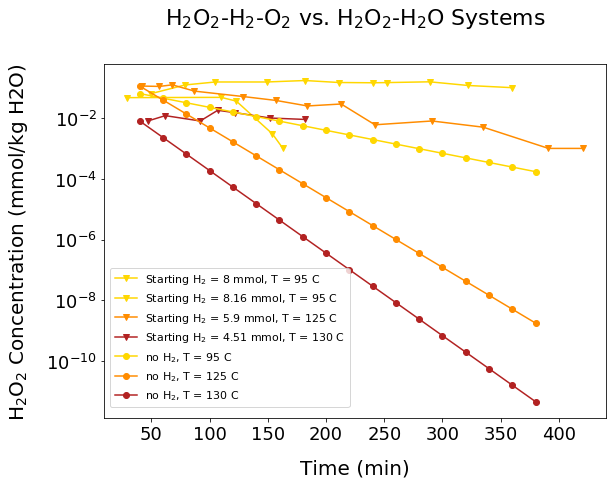

In [9]:
#H2o2 decomp: with H2 and without H2
fig1 = plt.figure(20)
fig1.set_figheight(6.5)
fig1.set_figwidth(9)
plt.clf()
#H2O2 with H2
#plt.plot(concentrations_55[0], concentrations_55[2], 'v-', color = 'limegreen', label = 'T = 55 C')
plt.plot(concentrations_95a[0], concentrations_95a[2], 'v-', color = 'gold', label = 'Starting H$_2$ = 8 mmol, T = 95 C')
plt.plot(concentrations_95b[0], concentrations_95b[2], 'v-', color = 'gold', label = 'Starting H$_2$ = 8.16 mmol, T = 95 C')
plt.plot(concentrations_125[0], concentrations_125[2], 'v-', color = 'darkorange', label = 'Starting H$_2$ = 5.9 mmol, T = 125 C')
plt.plot(concentrations_130[0], concentrations_130[2], 'v-', color = 'firebrick', label = 'Starting H$_2$ = 4.51 mmol, T = 130 C')
#H2O2 without H2
#plt.plot(t+40, H2O2[0], 'o-', color = 'limegreen', label = 'no H$_2$, T = 55 C')
plt.plot((t+40), H2O2[1], 'o-', color = 'gold', label = 'no H$_2$, T = 95 C')
plt.plot((t+40), H2O2[2], 'o-', color = 'darkorange', label = 'no H$_2$, T = 125 C')
plt.plot((t+40), H2O2[3], 'o-', color = 'firebrick', label = 'no H$_2$, T = 130 C')

plt.xlabel('Time (min)')
plt.ylabel('H$_2$O$_2$ Concentration (mmol/kg H2O)')
plt.yscale('log')
#plt.xlim(0,300)
#plt.ticklabel_format(style = 'sci', axis = 'x', )
#plt.ylim(1,3000)
#plt.yscale('log')
plt.title('H$_2$O$_2$-H$_2$-O$_2$ vs. H$_2$O$_2$-H$_2$O Systems')
plt.legend(bbox_to_anchor=(0.5,0.44), prop={'size': 11})
plt.savefig('Peroxide-H2-O2.png', bbox_inches = 'tight')
plt.show()

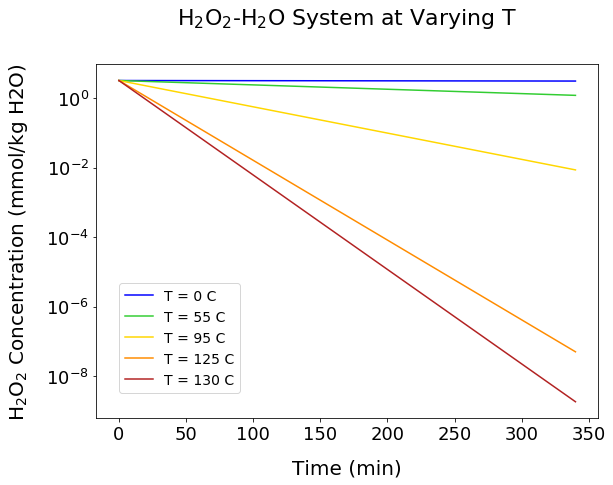

In [16]:
#if H2 did not participate -  this is how H2O2 would decompose at different temps

#initial H2O2 values:
H2O2_0 = 3.2 #mmol/kg
T_C = np.array([0, 55, 95, 125, 130])
T = T_C + 273.15

A = 728 #s^-1
E_a = 45.1 * 1000 #kJ/mol -> J/mol
t = np.arange(0, 360, 20) #min

k_H2O2 = f_kH2O2(A, E_a, T)

H2O2 = np.zeros([len(T),len(t)])
for i in range(0, len(T)):
    H2O2[i] = f_H2O2(H2O2_0, k_H2O2[i], t*60)    
    
fig1 = plt.figure(20)
fig1.set_figheight(6.5)
fig1.set_figwidth(9)
plt.clf()
plt.plot(t, H2O2[0], color = 'blue', label = 'T = 0 C')
plt.plot(t, H2O2[1], color = 'limegreen', label = 'T = 55 C')
plt.plot((t), H2O2[2], color = 'gold', label = 'T = 95 C')
plt.plot((t), H2O2[3], color = 'darkorange', label = 'T = 125 C')
plt.plot((t), H2O2[4], color = 'firebrick', label = 'T = 130 C')

plt.xlabel('Time (min)')
plt.ylabel('H$_2$O$_2$ Concentration (mmol/kg H2O)')
plt.yscale('log')
plt.title('H$_2$O$_2$-H$_2$O System at Varying T')
#plt.xlim(0,300)
#plt.ticklabel_format(style = 'sci', axis = 'x', )
#plt.ylim(1,3000)
#plt.yscale('log')
plt.savefig('Peroxide-Water.png')
plt.legend(bbox_to_anchor=(0.3,0.4), prop={'size': 14})
plt.show()

In [20]:
0.693/(24*60*60*k_H2O2)

array([4.64408256, 0.16646668, 0.02762442, 0.00910171, 0.00768666])

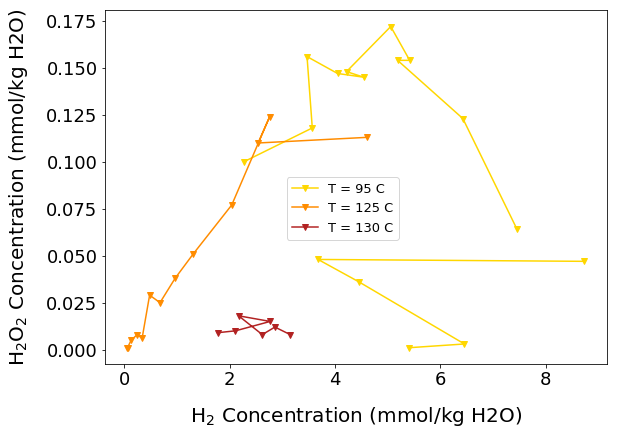

In [12]:
#H2o2 vs H2 concentration
fig1 = plt.figure(20)
fig1.set_figheight(6.5)
fig1.set_figwidth(9)
plt.clf()
#H2O2 with H2
#plt.plot(concentrations_55[0], concentrations_55[2], 'v-', color = 'limegreen', label = 'T = 55 C')
plt.plot(concentrations_95a[1], concentrations_95a[2], 'v-', color = 'gold', label = 'T = 95 C')
plt.plot(concentrations_95b[1], concentrations_95b[2], 'v-', color = 'gold')
plt.plot(concentrations_125[1], concentrations_125[2], 'v-', color = 'darkorange', label = 'T = 125 C')
plt.plot(concentrations_130[1], concentrations_130[2], 'v-', color = 'firebrick', label = 'T = 130 C')

plt.xlabel('H$_2$ Concentration (mmol/kg H2O)')
plt.ylabel('H$_2$O$_2$ Concentration (mmol/kg H2O)')
#plt.yscale('log')
#plt.xscale('log')
#plt.xlim(0,300)
#plt.ticklabel_format(style = 'sci', axis = 'x', )
#plt.ylim(1,3000)
#plt.yscale('log')
#plt.savefig('O2H2halflife.png')
plt.legend(bbox_to_anchor=(0.35,0.44), prop={'size': 13})
plt.show()

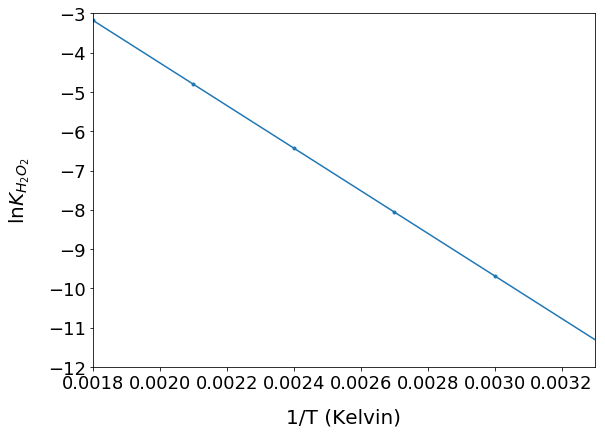

In [48]:
#Testing some things to address reviewer comments

#H2 + H2O2 back reaction kinetics:
#From Foustoukos (2010):
A_2 = 728 #s^-1
E_a2 = 45.1 *1000 #kJ/mol -> J/mol
R = 8.3145 #J/mol K
T_2 = np.array([(1/(1.8e-3)), (1/(2.1e-3)), (1/(2.4e-3)), (1/(2.7e-3)), (1/(3.0e-3)), 273.15])

def k(T):
    k = A_2*np.exp(-E_a2/(R*T))
    return k

fig18 = plt.figure(18)
fig18.set_figheight(6.5)
fig18.set_figwidth(9)
plt.ticklabel_format(style = 'sci', axis = 'x', )
plt.clf()
plt.plot((1/T_2), np.log(k(T_2)), '.-')
plt.xlabel('1/T (Kelvin)')
plt.ylabel('ln$K_{H_2O_2}$')
plt.xlim(1.8e-3, 3.3e-3)
plt.ylim(-12,-3)
#plt.title(r"FeOOH and SO$_4^{2-}$ Concentration")
#plt.yscale('log')
plt.savefig('O2H2O2Kinetics.png')